In [1]:
import warnings
warnings.filterwarnings("ignore")
from causalnex.structure import StructureModel
sm = StructureModel()

# Define edges

In [2]:
sm.add_edges_from([
    ("health", "absences"),
    ("health", "G1")
])

In [3]:
sm.edges

OutEdgeView([('health', 'absences'), ('health', 'G1')])

# Visualize

In [4]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

In [18]:
def visualize(sm):
    viz = plot_structure(
        sm,
        graph_attributes={"scale": "0.5"},
        all_node_attributes=NODE_STYLE.WEAK,
        all_edge_attributes=EDGE_STYLE.WEAK)
    Image(viz.draw(format='png'))

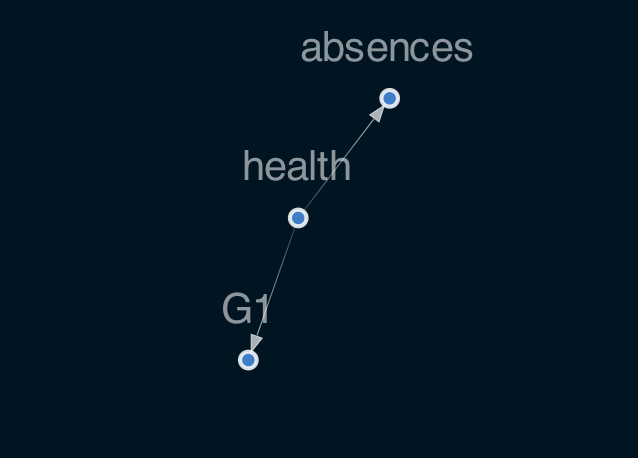

In [5]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

# Learning Structure with NOTEARS algorithm

In [71]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
data = pd.read_csv("./data/student-por.csv", delimiter=";")

In [72]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


In [73]:
drop_col = ['school','sex','age','Mjob', 'Fjob','reason','guardian']
data = data.drop(columns=drop_col)
#data = data
data.head(5)

,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,U,GT3,A,4,4,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,U,GT3,T,1,1,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,U,LE3,T,1,1,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,U,GT3,T,4,2,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,U,GT3,T,3,3,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [45]:
## make labeled data to numeric

In [74]:
import numpy as np
struct_data = data.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)
print(non_numeric_columns)

['address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [75]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,1,1,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,1,0,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,1,0,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13


In [76]:
from causalnex.structure.notears import from_pandas
sm = from_pandas(struct_data)

In [77]:
sm.nodes

NodeView(('address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'))

In [78]:
# neato, dot, twopi, circo, fdp, nop, wc, acyclic, gvpr, gvcolor, ccomps, sccmap, tred, sfdp, unflatten

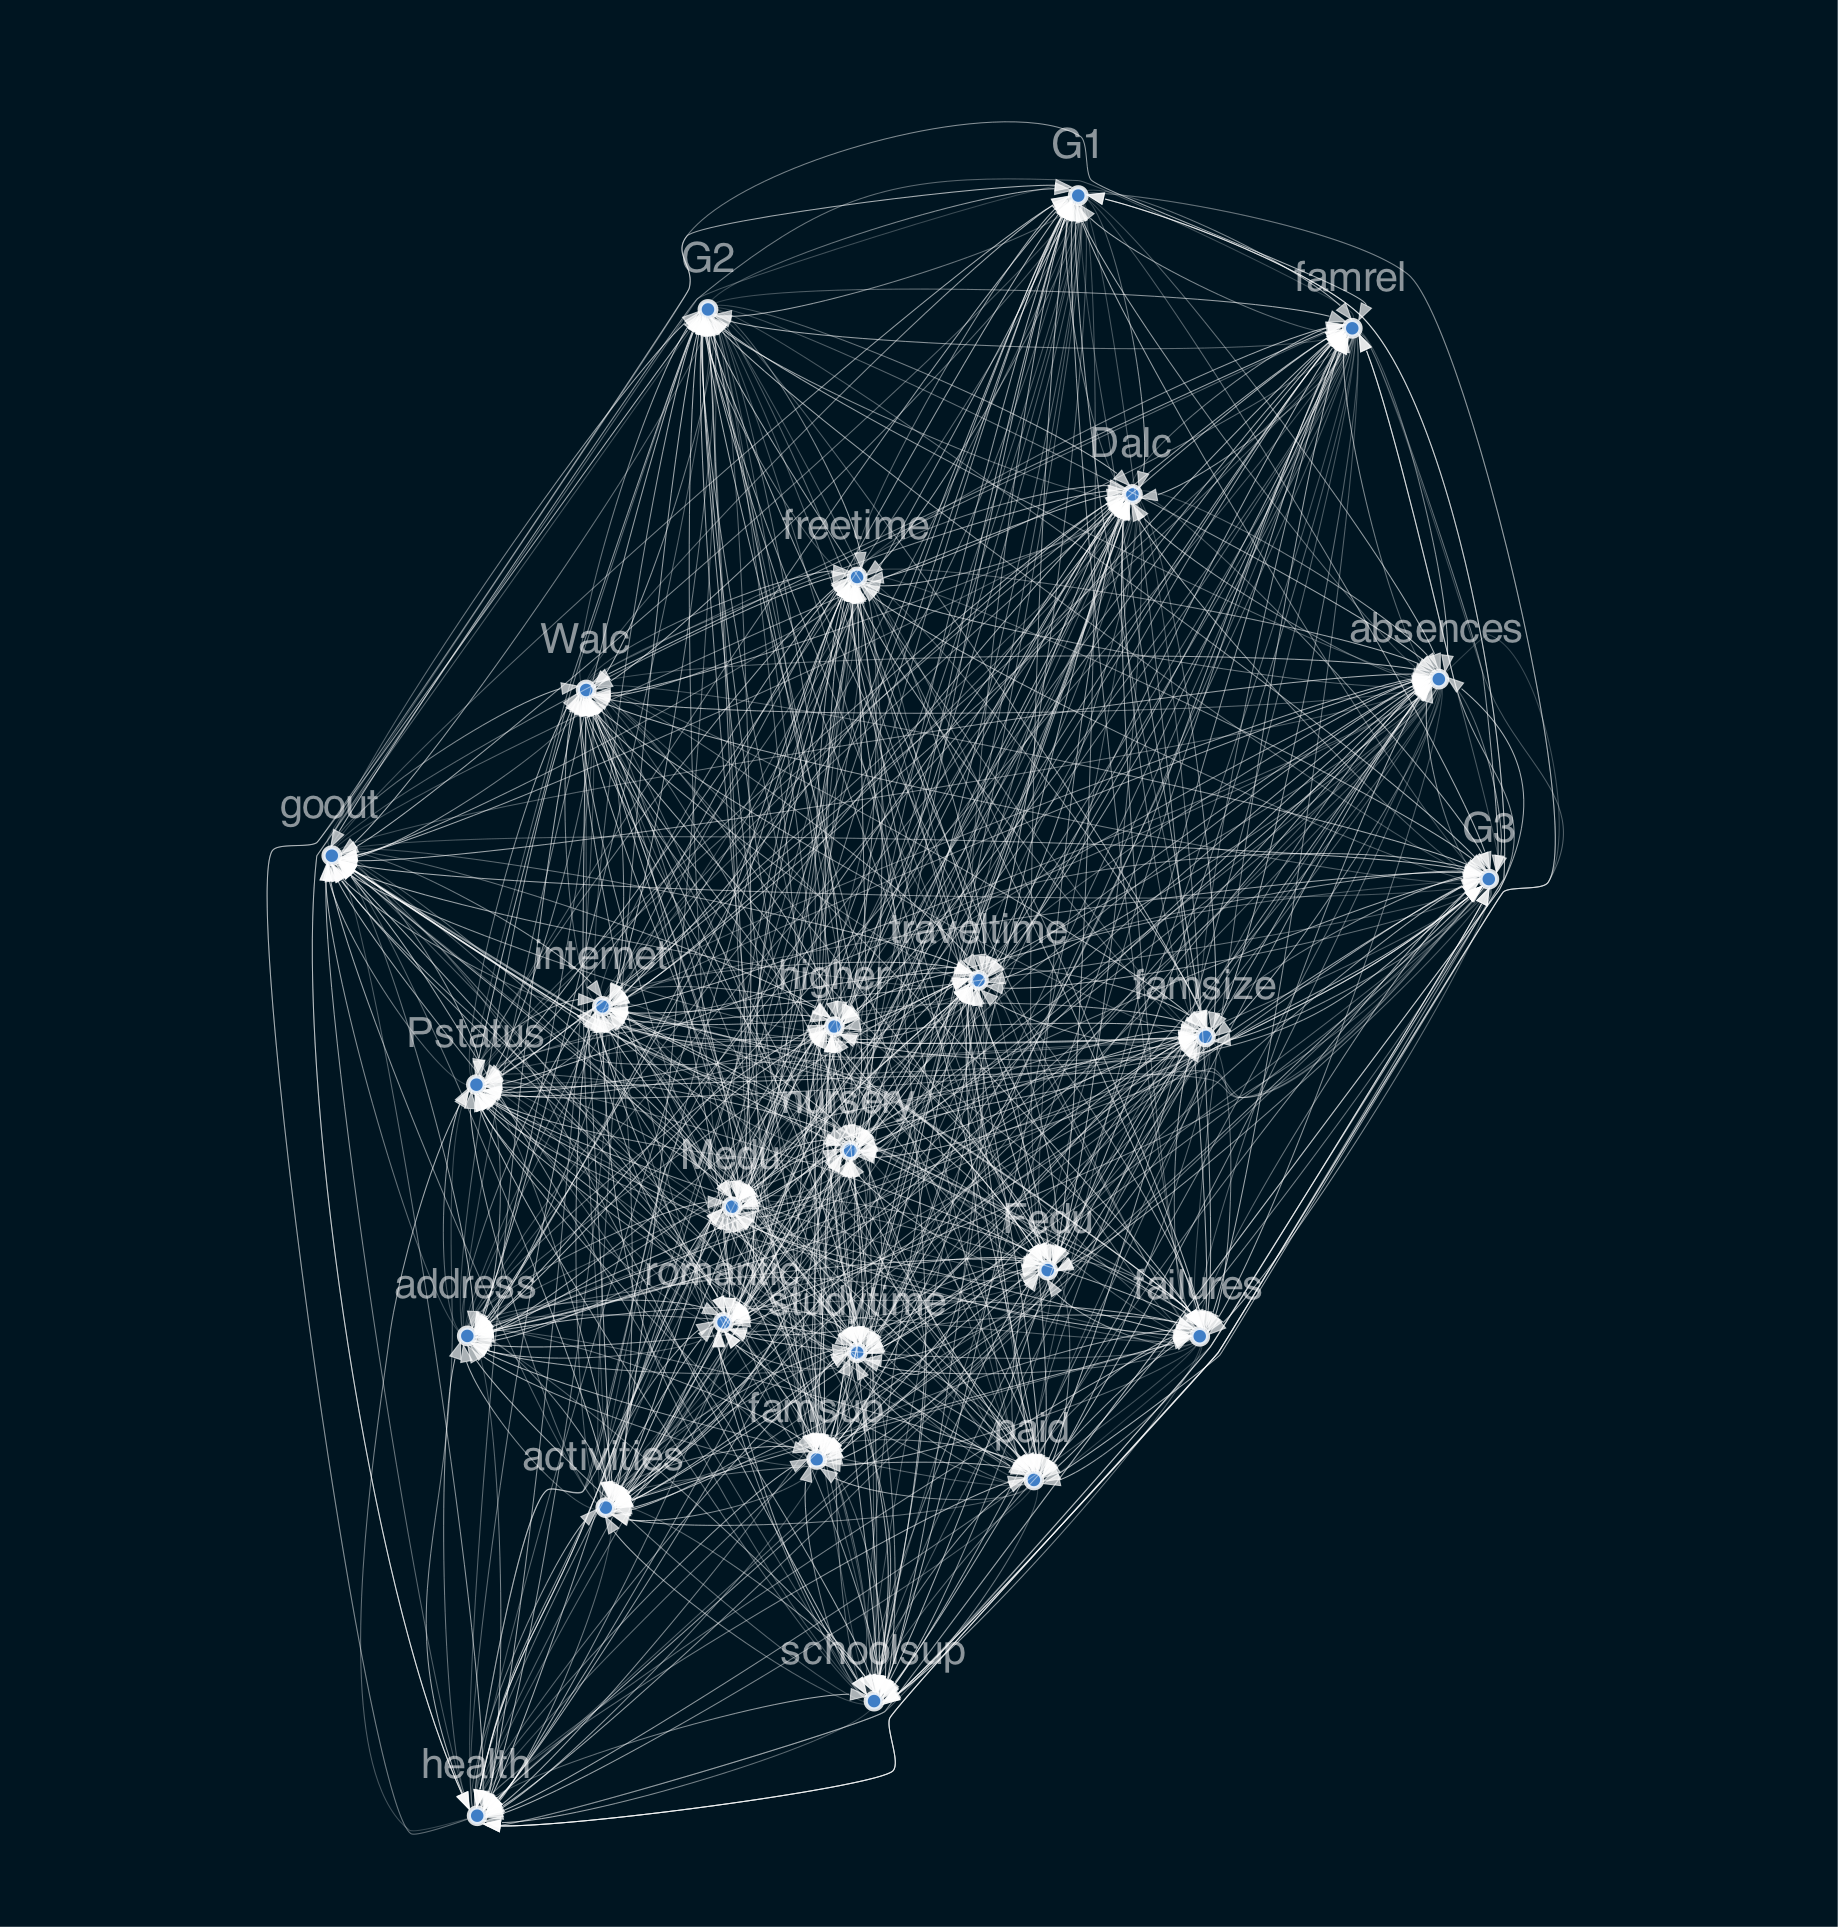

In [79]:
viz = plot_structure(
    sm,
    prog="fdp",
    graph_attributes={"scale": "1.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

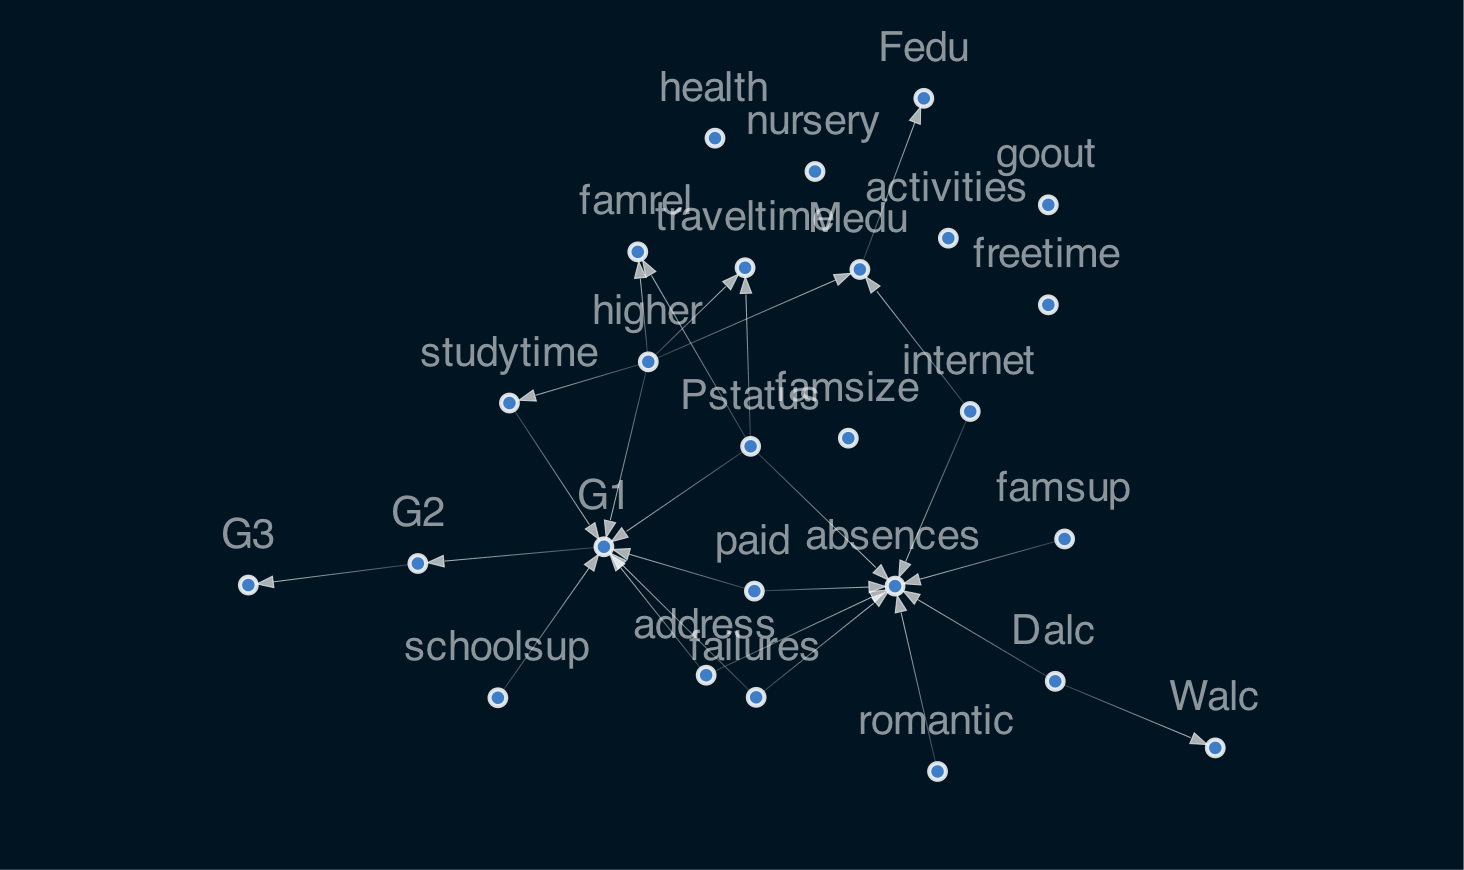

In [80]:
sm.remove_edges_below_threshold(0.6)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [81]:
sm = from_pandas(struct_data, tabu_edges=[("higher", "Medu")], w_threshold=0.8)

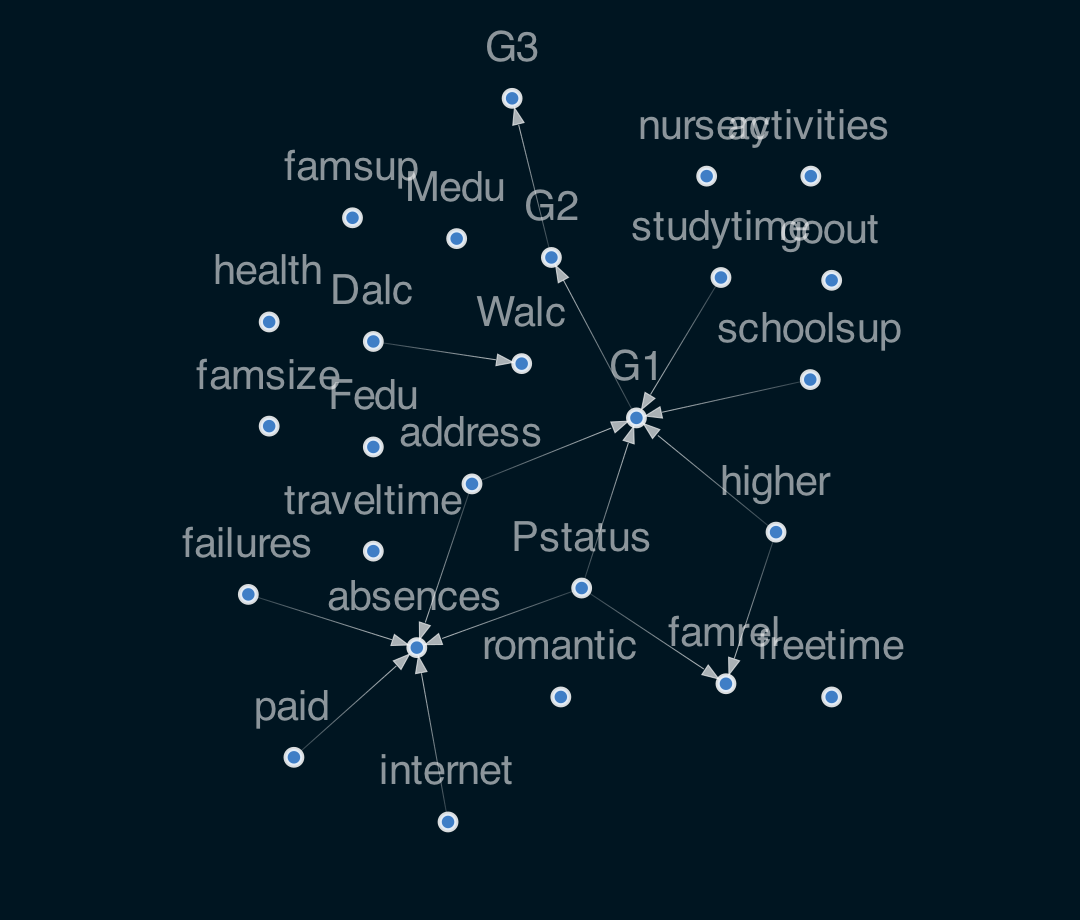

In [82]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [83]:
sm.add_edge("failures", "G1")

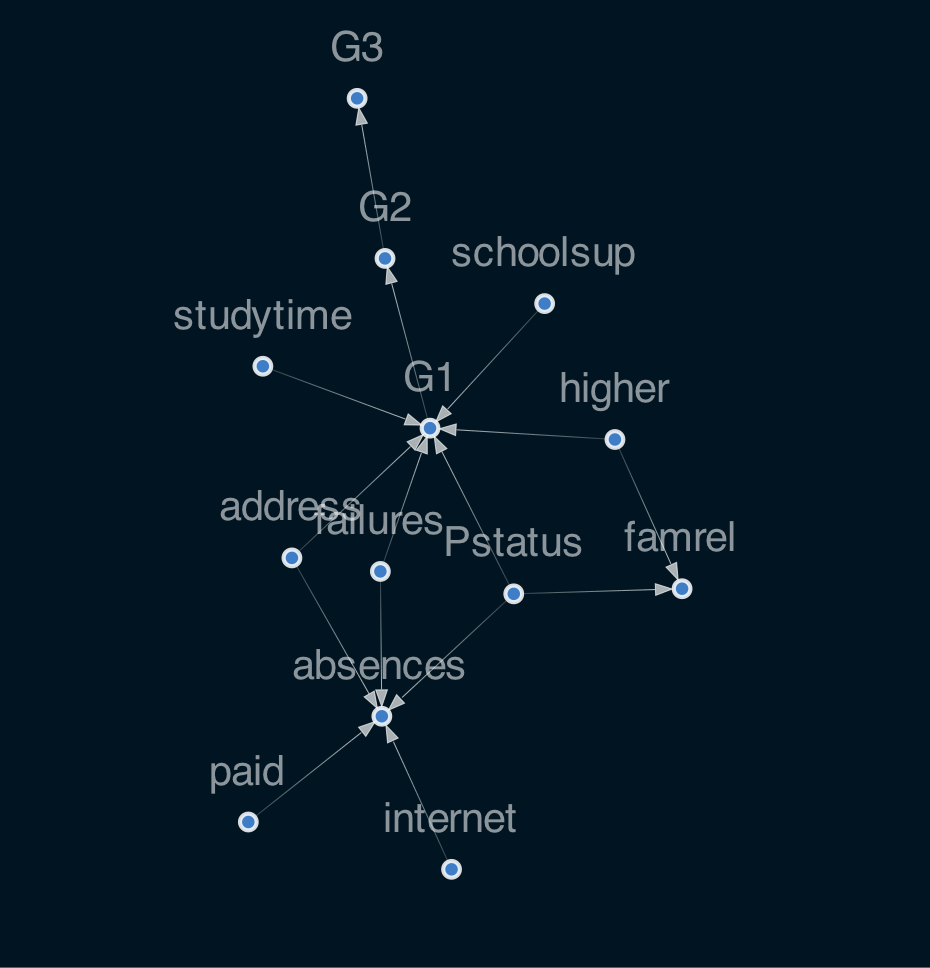

In [84]:
sm = sm.get_largest_subgraph()
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

# Learning a Bayesian Network

In [85]:
from causalnex.network import BayesianNetwork
bn = BayesianNetwork(sm)

In [98]:
discretised_data = data.copy()
data_vals = {col: data[col].unique() for col in data.columns}
failures_map = {v: 'no-failure' if v == [0]
            else 'have-failure' for v in data_vals['failures']}
studytime_map = {v: 'short-studytime' if v in [1,2]
                 else 'long-studytime' for v in data_vals['studytime']}

In [99]:
discretised_data["failures"] = discretised_data["failures"].map(failures_map)
discretised_data["studytime"] = discretised_data["studytime"].map(studytime_map)
from causalnex.discretiser import Discretiser
discretised_data["absences"] = Discretiser(method="fixed",
                          numeric_split_points=[1, 10]).transform(discretised_data["absences"].values)
discretised_data["G1"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["G1"].values)
discretised_data["G2"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["G2"].values)
discretised_data["G3"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["G3"].values)

In [100]:
discretised_data.head(5)

,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,U,GT3,A,4,4,2,short-studytime,no-failure,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,1,0,1,1
1,U,GT3,T,1,1,1,short-studytime,no-failure,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,1,0,1,1
2,U,LE3,T,1,1,1,short-studytime,no-failure,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,1,1,1,1
3,U,GT3,T,4,2,1,long-studytime,no-failure,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,1,1,1
4,U,GT3,T,3,3,1,short-studytime,no-failure,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,1,1,1


In [101]:
absences_map = {0: "No-absence", 1: "Low-absence", 2: "High-absence"}
G1_map = {0: "Fail", 1: "Pass"}
G2_map = {0: "Fail", 1: "Pass"}
G3_map = {0: "Fail", 1: "Pass"}
discretised_data["absences"] = discretised_data["absences"].map(absences_map)
discretised_data["G1"] = discretised_data["G1"].map(G1_map)
discretised_data["G2"] = discretised_data["G2"].map(G2_map)
discretised_data["G3"] = discretised_data["G3"].map(G3_map)

In [102]:
## train/test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(discretised_data, train_size=0.9, test_size=0.1, random_state=7)

In [103]:
bn = bn.fit_node_states(discretised_data)

In [107]:
bn = bn.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

In [124]:
bn.nodes

['address',
 'absences',
 'G1',
 'Pstatus',
 'famrel',
 'studytime',
 'failures',
 'schoolsup',
 'paid',
 'higher',
 'internet',
 'G2',
 'G3']

In [113]:
bn.cpds["G1"]

Pstatus                A                                                 \
address                R                                                  
failures    have-failure                                                  
higher                no                                                  
schoolsup             no                            yes                   
studytime long-studytime short-studytime long-studytime short-studytime   
G1                                                                        
Fail            0.666667        0.666667            0.5             0.5   
Pass            0.333333        0.333333            0.5             0.5   

Pstatus                                                                  \
address                                                                   
failures                                                                  
higher               yes                                                  
schoolsup             no                            yes                   
studytime long-studytime short-studytime long-studytime short-studytime   
G1                                                                        
Fail                 0.5             0.5            0.5             0.5   
Pass                 0.5             0.5            0.5             0.5   

Pstatus                                                                  \
address                                                                   
failures      no-failure                                                  
higher                no                                                  
schoolsup             no                            yes                   
studytime long-studytime short-studytime long-studytime short-studytime   
G1                                                                        
Fail            0.666667        0.333333            0.5             0.5   
Pass            0.333333        0.666667            0.5             0.5   

Pstatus                                                                  \
address                                                                   
failures                                                                  
higher               yes                                                  
schoolsup             no                            yes                   
studytime long-studytime short-studytime long-studytime short-studytime   
G1                                                                        
Fail            0.333333        0.222222            0.5             0.5   
Pass            0.666667        0.777778            0.5             0.5   

Pstatus                                                                  \
address                U                                                  
failures    have-failure                                                  
higher                no                                                  
schoolsup             no                            yes                   
studytime long-studytime short-studytime long-studytime short-studytime   
G1                                                                        
Fail                 0.5            0.25            0.5             0.5   
Pass                 0.5            0.75            0.5             0.5   

Pstatus                                                                  \
address                                                                   
failures                                                                  
higher               yes                                                  
schoolsup             no                            yes                   
studytime long-studytime short-studytime long-studytime short-studytime   
G1                                                                        
Fail                 0.5             0.5            0.5             0.5   
Pass                

In [114]:
discretised_data.loc[18, discretised_data.columns != 'G1']

address                     U
famsize                   GT3
Pstatus                     T
Medu                        3
Fedu                        2
traveltime                  1
studytime     short-studytime
failures         have-failure
schoolsup                  no
famsup                    yes
paid                      yes
activities                yes
nursery                   yes
higher                    yes
internet                  yes
romantic                   no
famrel                      5
freetime                    5
goout                       5
Dalc                        2
Walc                        4
health                      5
absences          Low-absence
G2                       Fail
G3                       Fail
Name: 18, dtype: object

In [115]:
predictions = bn.predict(discretised_data, "G1")

In [116]:
print('The prediction is \'{prediction}\''.format(prediction=predictions.loc[18, 'G1_prediction']))

The prediction is 'Fail'


In [118]:
# Model evaluation

In [126]:
from causalnex.evaluation import classification_report
classification_report(bn, test, "G1")

{'G1_Fail': {'precision': 0.7777777777777778,
  'recall': 0.5833333333333334,
  'f1-score': 0.6666666666666666,
  'support': 12},
 'G1_Pass': {'precision': 0.9107142857142857,
  'recall': 0.9622641509433962,
  'f1-score': 0.9357798165137615,
  'support': 53},
 'accuracy': 0.8923076923076924,
 'macro avg': {'precision': 0.8442460317460317,
  'recall': 0.7727987421383649,
  'f1-score': 0.8012232415902141,
  'support': 65},
 'weighted avg': {'precision': 0.8861721611721611,
  'recall': 0.8923076923076924,
  'f1-score': 0.8860973888496825,
  'support': 65}}

In [127]:
from causalnex.evaluation import roc_auc
roc, auc = roc_auc(bn, test, "G1")
print(auc)

0.9123076923076924


# Querying Marginals

In [129]:
bn = bn.fit_cpds(discretised_data, method="BayesianEstimator", bayes_prior="K2")

In [130]:
from causalnex.inference import InferenceEngine
ie = InferenceEngine(bn)
marginals = ie.query()
marginals["G1"]

{'Fail': 0.2614871976647877, 'Pass': 0.7385128023352123}

In [131]:
import numpy as np
labels, counts = np.unique(discretised_data["G1"], return_counts=True)
list(zip(labels, counts))

[('Fail', 157), ('Pass', 492)]

In [132]:
marginals_short = ie.query({"studytime": "short-studytime"})
marginals_long = ie.query({"studytime": "long-studytime"})
print("Marginal G1 | Short Studtyime", marginals_short["G1"])
print("Marginal G1 | Long Studytime", marginals_long["G1"])

Marginal G1 | Short Studtyime {'Fail': 0.2817997392562337, 'Pass': 0.7182002607437663}
Marginal G1 | Long Studytime {'Fail': 0.1823751935717876, 'Pass': 0.8176248064282123}


# Do-Calculus

In [133]:
print("distribution before do", ie.query()["higher"])
ie.do_intervention("higher",
                   {'yes': 1.0,
                    'no': 0.0})
print("distribution after do", ie.query()["higher"])

distribution before do {'no': 0.10752688172043014, 'yes': 0.89247311827957}
distribution after do {'no': 0.0, 'yes': 1.0}


In [134]:
ie.reset_do("higher")

In [135]:
print("marginal G1", ie.query()["G1"])
ie.do_intervention("higher",
                   {'yes': 1.0,
                    'no': 0.0})
print("updated marginal G1", ie.query()["G1"])

marginal G1 {'Fail': 0.2614871976647877, 'Pass': 0.7385128023352123}
updated marginal G1 {'Fail': 0.22096538189680154, 'Pass': 0.7790346181031985}
